uni # ppy2104

# MNIST Sign Language

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics         import accuracy_score
from sklearn.model_selection import train_test_split

import keras
from keras.utils  import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [2]:
class SignLanguage:
    def __init__(self):
        self.model = None

        self.data = {
            "train": None,
            "test" : None
        }
        self.create_model()

    def create_model(self):
        """
        Create a CNN model and save it to self.model
        """

        # TODO: Create a Sequential model
        model = Sequential()
        model.add(keras.layers.Input(shape = (28, 28, 1)))
        model.add(keras.layers.Conv2D(40, 4, activation="relu"))
        model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))
        model.add(keras.layers.Conv2D(40, 4, activation="relu"))
        model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))
        model.add(keras.layers.Flatten())
        model.add(keras.layers.Dropout(0.5))
        model.add(keras.layers.Dense(25, activation='softmax'))


        # TODO: Compile the model with categorical_crossentropy
        model.compile('adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
        self.model = model
        self.model.summary()



    def prepare_data(self, images, labels):
        """
        Use this method to normalize the dataset and split it into train/test.
        Save your data in self.data["train"] and self.data["test"] as a tuple
        of (images, labels)

        :param images numpy array of size (num_examples, 28*28)
        :param labels numpy array of size (num_examples, )
        """


        # TODO : split into training and validation set
        x_train, x_val, y_train, y_val = train_test_split(images, labels, test_size=0.2)
        self.data["train"] = (x_train, y_train)
        self.data["test"] = (x_val, y_val)



        # TODO : reshape each example into a 2D image (28, 28, 1)

        self.data = {
            "train": None,
            "test" : None
        }

        x_train = x_train.astype("float32")
        x_val = x_val.astype("float32")

        x_train = x_train.reshape(-1, 28, 28, 1)
        x_val = x_val.reshape(-1, 28, 28, 1)


        # one hot encoding
        y_train = keras.utils.to_categorical(y_train, num_classes = 25)
        y_val = keras.utils.to_categorical(y_val, num_classes = 25)


        self.data = {
            "train": (x_train, y_train),
            "test" : (x_val, y_val) #test is validation from training set
        }



    def train(self, batch_size:int=128, epochs:int=50, verbose:int=1):
        """
        Use model.fit() to train your model. Make sure to return the history for a neat visualization.

        :param batch_size The batch size to use for training
        :param epochs     Number of epochs to use for training
        :param verbose    Whether or not to print training output
        """

        x_train, y_train = self.data["train"]
        x_val, y_val = self.data["test"]



        history = self.model.fit(
            x_train, y_train,
            batch_size = batch_size,
            epochs = epochs,
            verbose = verbose,
            validation_data = (x_val, y_val)
        )


        # history = None
        return history

    def predict(self, data):
        """
        Use the trained model to predict labels for test data.

        :param data: numpy array of test images
        :return a numpy array of test labels. array size = (num_examples, )
        """

        # Don't forget to normalize the data in the same way as training data
        # self.model.predict() and np.argmax( , axis=1) might help


        data = data.astype("float32")
        data = np.reshape(data, (data.shape[0], 28, 28, 1))

        predictions = self.model.predict(data)
        return np.argmax(predictions, axis=1)



        # return np.zeros(data.shape[0])

    def visualize_data(self, data):
        """
        Visualizing the hand gestures

        :param data: numpy array of images
        """
        if data is None: return

        nrows, ncols = 5, 5
        fig, axs = plt.subplots(nrows, ncols, figsize=(10, 10), sharex=True, sharey=True)
        plt.subplots_adjust(wspace=0, hspace=0)

        for i in range(nrows):
            for j in range(ncols):
                axs[i][j].imshow(data[0][i*ncols+j].reshape(28, 28), cmap='gray')
        plt.show()

    def visualize_accuracy(self, history):
        """
        Plots out the accuracy measures given a keras history object

        :param history: return value from model.fit()
        """
        if history is None: return

        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title("Accuracy")
        plt.xlabel('epoch')
        plt.ylabel('accuracy')
        plt.legend(['train','test'])
        plt.show()

# Grading Script

Do NOT modify this section

In [3]:
if __name__=="__main__":
    train = pd.read_csv('train.csv')
    test  = pd.read_csv('test.csv')

    train_labels, test_labels = train['label'].values, test['label'].values
    train.drop('label', axis=1, inplace=True)
    test.drop('label', axis=1, inplace=True)

    num_classes = test_labels.max() + 1
    train_images, test_images = train.values, test.values

    print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(27455, 784) (27455,) (7172, 784) (7172,)


In [4]:
if __name__=="__main__":
    my_model = SignLanguage()
    my_model.prepare_data(train_images, train_labels)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 40)        680       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 40)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 40)          25640     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 40)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 640)               0         
                                                                 
 dropout (Dropout)           (None, 640)               0

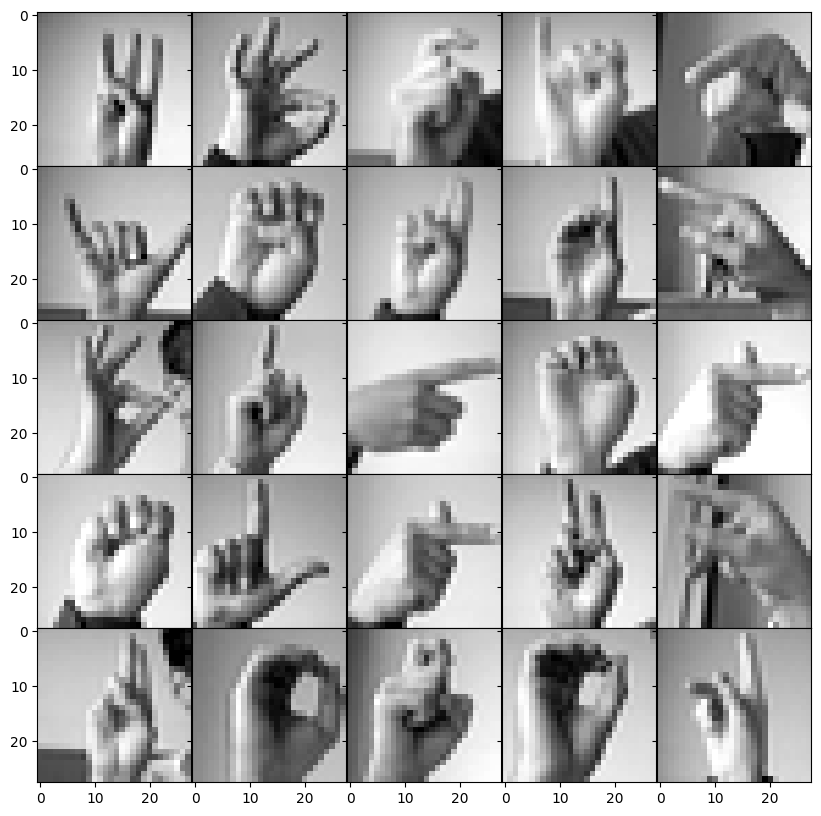

In [5]:
if __name__=="__main__":
    my_model.visualize_data(my_model.data["train"])

Epoch 1/30
172/172 [==============================] - 13s 12ms/step - loss: 3.8354 - accuracy: 0.1265 - val_loss: 2.4259 - val_accuracy: 0.3187
Epoch 2/30
172/172 [==============================] - 2s 10ms/step - loss: 2.5454 - accuracy: 0.2131 - val_loss: 2.0900 - val_accuracy: 0.4489
Epoch 3/30
172/172 [==============================] - 2s 11ms/step - loss: 2.4293 - accuracy: 0.2502 - val_loss: 1.8839 - val_accuracy: 0.4806
Epoch 4/30
172/172 [==============================] - 2s 13ms/step - loss: 2.2372 - accuracy: 0.3015 - val_loss: 1.6753 - val_accuracy: 0.5897
Epoch 5/30
172/172 [==============================] - 2s 9ms/step - loss: 1.9517 - accuracy: 0.3943 - val_loss: 1.0850 - val_accuracy: 0.7032
Epoch 6/30
172/172 [==============================] - 1s 8ms/step - loss: 1.4302 - accuracy: 0.5460 - val_loss: 0.8420 - val_accuracy: 0.7918
Epoch 7/30
172/172 [==============================] - 1s 6ms/step - loss: 0.9748 - accuracy: 0.6843 - val_loss: 0.3294 - val_accuracy: 0.9250
E

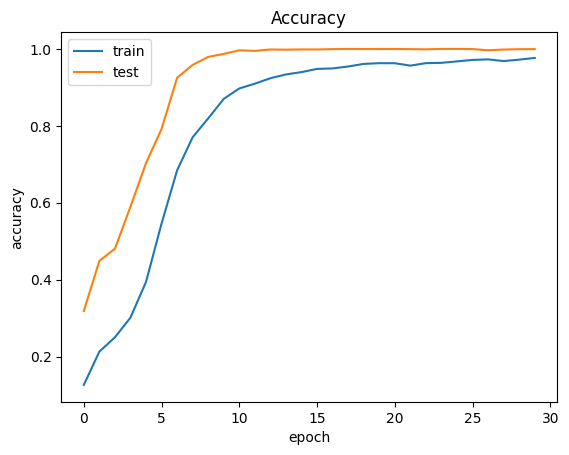

In [6]:
if __name__=="__main__":
    history = my_model.train(epochs=30, verbose=1)
    my_model.visualize_accuracy(history)

In [7]:
if __name__=="__main__":
    y_pred = my_model.predict(test_images)
    accuracy = accuracy_score(test_labels, y_pred)
    print(accuracy)

225/225 [==============================] - 1s 3ms/step
0.9580312325711099
